In [1]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import scipy.optimize as optimization  
import pandas as pd
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls

2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_combined.out
2022_Mar_week2_Weighted_mean_calculation_Beuermann_2011_combined.txt
2D_orbit_modeling_K.pdf
2D_orbit_modeling_K1.ipynb
2D_orbit_modeling_K1.pdf
2D_orbit_modeling_K2.ipynb
2D_orbit_modeling_K2.pdf
2D_orbit_modeling_P.ipynb
2D_orbit_modeling_P.pdf
2D_orbit_modeling_e.ipynb
2D_orbit_modeling_e.pdf
2D_orbit_modeling_tau.ipynb
2D_orbit_modeling_tau.pdf
2D_orbit_modeling_w.ipynb
2D_orbit_modeling_w.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K1.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K2.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K2_rev2.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K2_rev2.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev1.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev2

In [3]:
#Read data ---#1
Input = "Linear_fit_Beuermann_2011_Table1_rev.dat"
Data   = np.genfromtxt(Input)

#Input calculation ---#1
N = 2400000

Epoch = Data[:,0]
T_obs = Data[:,1]
T_obs_err = Data[:,2]

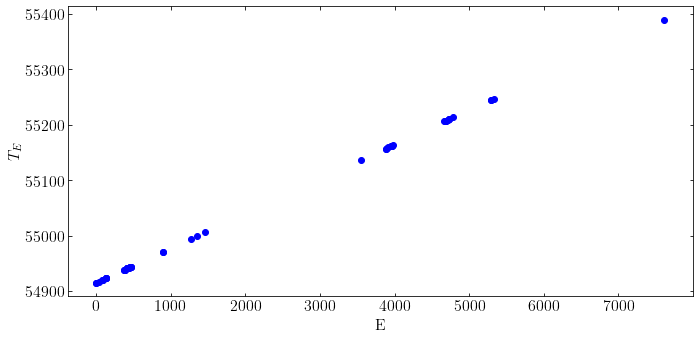

In [4]:
fig, (ax0) = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
#plt.xlim(-0.04,0.04)
#plt.xlabel('Orbital phase')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(Epoch, T_obs, yerr= T_obs_err, fmt='o', color='blue',
             ecolor='lightgray', elinewidth=1, capsize=0)


#ax0.legend(loc="best")
ax0.set_xlabel('E')
ax0.set_ylabel('$T_{E}$')

#ax0.set_ylim(-30, 40)

fig.align_ylabels()
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
#plt.savefig("spot_longitude_Beuermann_Kittipong.png")
plt.show()

In [5]:
x = Epoch
y = T_obs
dy = T_obs_err

len_x = len(x)
print(len_x)

54


In [6]:
# Calling the scipy's curve_fit function from optimize module
from scipy.optimize import curve_fit

# Defining a fitting fucntion
def linear_fit(x,m,c):
    return m*x + c

#params, covariance = curve_fit(f = linear_fit, xdata = x, ydata = y)
params, params_covariance = optimization.curve_fit(linear_fit, x, y,sigma=dy, absolute_sigma=True)

Period = params[0]
T0 = params[1]

dPeriod = params_covariance[0,0]
dT0 = params_covariance[1,1]


print('Slope (m) is ', Period)
print('The error of the slope (dm) is ', dPeriod)
print('Intercept (c) is ', T0)
print('The error of the intercept (dc) is ', dT0)
#print(covariance)

Slope (m) is  0.06236285649304073
The error of the slope (dm) is  8.980005261065642e-19
Intercept (c) is  54914.832292031744
The error of the intercept (dc) is  7.591088868471324e-12


In [7]:
# define a sequence of inputs between the smallest and largest known inputs
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max)
# calculate the output for the range
y_line = linear_fit(x_line, *params)

ys = Period*x + T0 #just only our data point
Residual = y - ys
print(y)
print(ys)
print(Residual)

print(x_line)
print(y_line)
print(len(x_line))

#np.savetxt("Linear_fit_period_year_2020g.out", np.c_[x, Residual, dy])

#Reduced_chisqrt
n = 2
dof = len_x - n
Chi_sqr = ((y - ys)**2/(dy)**2)/dof
Reduced_chisq = sum(Chi_sqr)
print(Reduced_chisq)

[54914.83228  54914.894663 54916.827926 54919.696603 54920.756784
 54922.627668 54922.690017 54922.752365 54922.814727 54937.781831
 54937.844195 54938.717285 54938.779611 54940.650507 54940.712869
 54940.775243 54940.837637 54941.773045 54941.835408 54942.646122
 54942.770852 54942.833221 54942.895591 54943.706304 54943.768653
 54943.831008 54970.647033 54970.709414 54993.658926 54998.647982
 55005.632601 55135.970976 55156.9249   55156.987244 55157.922708
 55158.982865 55160.916107 55160.978466 55161.913906 55161.976285
 55162.911738 55205.942102 55206.004463 55206.93992  55207.002308
 55208.873171 55209.870977 55209.933305 55209.995687 55212.989111
 55244.918892 55244.981257 55246.976864 55389.66308 ]
[54914.83229203 54914.89465489 54916.82790344 54919.69659484
 54920.7567634  54922.62764909 54922.69001195 54922.75237481
 54922.81473766 54937.78182322 54937.84418608 54938.71726607
 54938.77962893 54940.65051462 54940.71287748 54940.77524033
 54940.83760319 54941.77304604 54941.83540

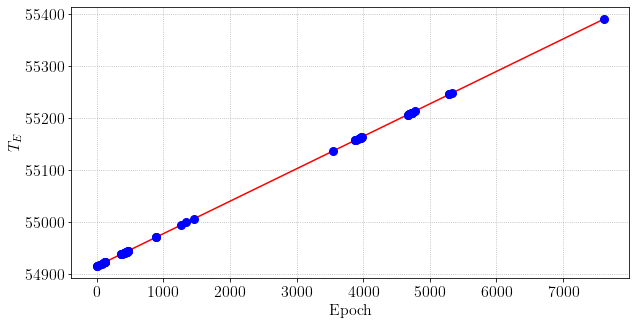

In [8]:
#Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
# create a line plot for the mapping function
plt.plot(x_line, y_line, '-', color='red')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('Epoch')
plt.ylabel('$T_{E}$')
plt.grid(linestyle='dotted')
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.show()

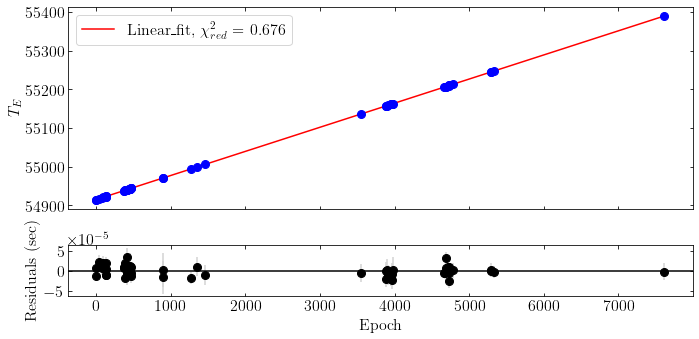

In [9]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('Epoch')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.plot(x_line, y_line, '-', color='red',label='Linear\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq)))

ax0.legend(loc="best")
ax0.set_ylabel('$T_{E}$')
ax1.set_ylabel('Residuals (sec)')


ax1.errorbar(x, Residual, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')
#plt.savefig("Linear_fit_period_year_2020g_Res.jpg", dpi=1000)

plt.show()

In [10]:
#Linear phemeris equation(From equation 1) convert from TT to TDB
#New ephemeris
#BJD0 = 2448773.21461 - 2400000
#P0 = 0.0623628426

#Schwope_2002
BJD0 = 2448773.215071 - 2400000
dBJD0 = 0.000018
P0 = 0.06236283691
dP0 = 0.00000000070

In [11]:
t = np.linspace(40000, 60000, num=100)

x_data = []
for i in range(len(t)):
    print('%0.0f %0.5f' %(i, t[i]))
    x_data.append('%0.0f %0.5f' %(i, t[i]))
    
data_out = x_data
f = open("x_data.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

0 40000.00000
1 40202.02020
2 40404.04040
3 40606.06061
4 40808.08081
5 41010.10101
6 41212.12121
7 41414.14141
8 41616.16162
9 41818.18182
10 42020.20202
11 42222.22222
12 42424.24242
13 42626.26263
14 42828.28283
15 43030.30303
16 43232.32323
17 43434.34343
18 43636.36364
19 43838.38384
20 44040.40404
21 44242.42424
22 44444.44444
23 44646.46465
24 44848.48485
25 45050.50505
26 45252.52525
27 45454.54545
28 45656.56566
29 45858.58586
30 46060.60606
31 46262.62626
32 46464.64646
33 46666.66667
34 46868.68687
35 47070.70707
36 47272.72727
37 47474.74747
38 47676.76768
39 47878.78788
40 48080.80808
41 48282.82828
42 48484.84848
43 48686.86869
44 48888.88889
45 49090.90909
46 49292.92929
47 49494.94949
48 49696.96970
49 49898.98990
50 50101.01010
51 50303.03030
52 50505.05051
53 50707.07071
54 50909.09091
55 51111.11111
56 51313.13131
57 51515.15152
58 51717.17172
59 51919.19192
60 52121.21212
61 52323.23232
62 52525.25253
63 52727.27273
64 52929.29293
65 53131.31313
66 53333.33333
67 53

In [12]:
#Input data
Input = "x_data.out"
Data   = np.genfromtxt(Input)

x = Data[:,1]
#print(t)

t = x
len_x = len(t)

Epoch = (t-BJD0)/P0

In [13]:
def TAno(P,tau,e,t):
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    return f

In [14]:
from scipy.optimize import fsolve
from scipy.optimize import curve_fit

In [15]:
#Parameters
K = 711       
P = 10220       
e = 0.39  
#e = 0
w = -1.36           
tau = 53025   

output = []
print("     BJD      MAno   EAno        O           C         OC")
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0
    dP = Period - P0
    dT0 = T0 - T0
    OC = dP*Epoch + dT0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    print('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    
data_out = output
f = open("K_output_a.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

     BJD      MAno   EAno        O           C         OC
40000.00000 4.55869 4.21580 46623.56893 46141.61722 481.95171
40202.02020 4.68289 4.32220 46752.54387 46343.63742 408.90645
40404.04040 4.80709 4.43229 46877.36235 46545.65762 331.70473
40606.06061 4.93129 4.54664 46998.42999 46747.67783 250.75216
40808.08081 5.05549 4.66591 47116.30753 46949.69803 166.60950
41010.10101 5.17969 4.79090 47231.77517 47151.71823 80.05694
41212.12121 5.30389 4.92247 47345.92298 47353.73843 -7.81545
41414.14141 5.42810 5.06164 47460.27582 47555.75863 -95.48281
41616.16162 5.55230 5.20950 47576.95882 47757.77884 -180.82002
41818.18182 5.67650 5.36715 47698.89675 47959.79904 -260.90229
42020.20202 5.80070 5.53553 47830.00402 48161.81924 -331.81522
42222.22222 5.92490 5.71506 47975.23977 48363.83944 -388.59968
42424.24242 6.04910 5.90515 48140.27733 48565.85964 -425.58231
42626.26263 6.17330 6.10366 48330.48111 48767.87985 -437.39874
42828.28283 0.01431 0.02346 48549.19397 48969.90005 -420.70608
43030.3

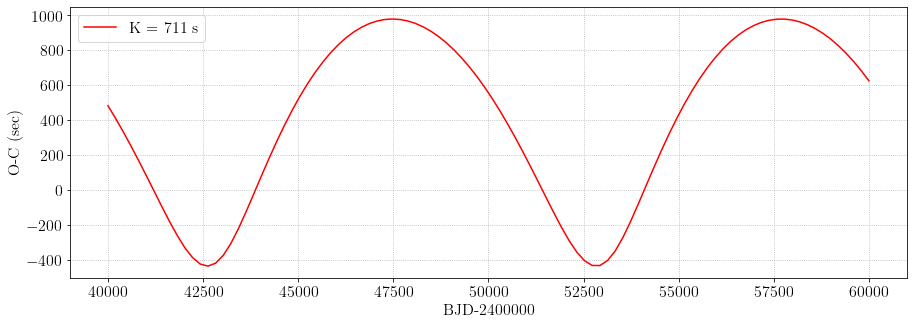

In [16]:
InputFile_out = "K_output_a.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_a = Data_out[:,0]
y_a = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-', color='red',label='K = 711 s')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [17]:
#Parameters
K = 1400       
P = 10220       
e = 0.39 
#e = 0 
w = -1.36           
tau = 53025   

output = []
print("     BJD      MAno   EAno        O           C         OC")
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0
    dP = Period - P0
    dT0 = T0 - T0
    OC = dP*Epoch + dT0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    print('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    
data_out = output
f = open("K_output_b.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

     BJD      MAno   EAno        O           C         OC
40000.00000 4.55869 4.21580 47090.61060 46141.61722 948.99338
40202.02020 4.68289 4.32220 47148.80041 46343.63742 805.16299
40404.04040 4.80709 4.43229 47198.80591 46545.65762 653.14829
40606.06061 4.93129 4.54664 47241.42578 46747.67783 493.74795
40808.08081 5.05549 4.66591 47277.76417 46949.69803 328.06613
41010.10101 5.17969 4.79090 47309.35733 47151.71823 157.63910
41212.12121 5.30389 4.92247 47338.35165 47353.73843 -15.38678
41414.14141 5.42810 5.06164 47367.74971 47555.75863 -188.00892
41616.16162 5.55230 5.20950 47401.73597 47757.77884 -356.04287
41818.18182 5.67650 5.36715 47446.06951 47959.79904 -513.72953
42020.20202 5.80070 5.53553 47508.45800 48161.81924 -653.36124
42222.22222 5.92490 5.71506 47598.66626 48363.83944 -765.17318
42424.24242 6.04910 5.90515 47727.86547 48565.85964 -837.99417
42626.26263 6.17330 6.10366 47906.61837 48767.87985 -861.26148
42828.28283 0.01431 0.02346 48141.50733 48969.90005 -828.39272
4303

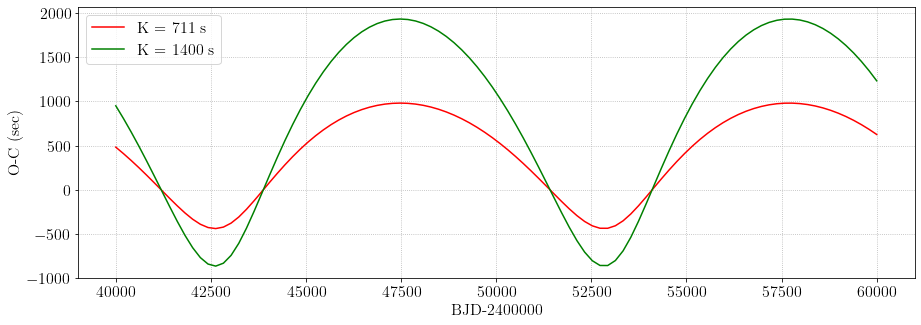

In [18]:
InputFile_out = "K_output_b.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_b = Data_out[:,0]
y_b = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-', color='red',label='K = 711 s')
plt.plot(x_b, y_b, '-', color='green',label='K = 1400 s')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [19]:
#Parameters
K = 2033       
P = 10220       
e = 0.39
#e = 0 
w = -1.36           
tau = 53025   

output = []
print("     BJD      MAno   EAno        O           C         OC")
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0
    dP = Period - P0
    dT0 = T0 - T0
    OC = dP*Epoch + dT0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    print('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    
data_out = output
f = open("K_output_c.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

     BJD      MAno   EAno        O           C         OC
40000.00000 4.55869 4.21580 47519.69243 46141.61722 1378.07521
40202.02020 4.68289 4.32220 47512.85033 46343.63742 1169.21291
40404.04040 4.80709 4.43229 47494.12344 46545.65762 948.46582
40606.06061 4.93129 4.54664 47464.67154 46747.67783 716.99371
40808.08081 5.05549 4.66591 47426.09806 46949.69803 476.40002
41010.10101 5.17969 4.79090 47380.63382 47151.71823 228.91559
41212.12121 5.30389 4.92247 47331.39571 47353.73843 -22.34272
41414.14141 5.42810 5.06164 47282.74386 47555.75863 -273.01477
41616.16162 5.55230 5.20950 47240.75474 47757.77884 -517.02410
41818.18182 5.67650 5.36715 47213.79136 47959.79904 -746.00769
42020.20202 5.80070 5.53553 47213.04634 48161.81924 -948.77290
42222.22222 5.92490 5.71506 47252.69961 48363.83944 -1111.13983
42424.24242 6.04910 5.90515 47348.97329 48565.85964 -1216.88635
42626.26263 6.17330 6.10366 47517.20602 48767.87985 -1250.67383
42828.28283 0.01431 0.02346 47766.95632 48969.90005 -1202.9437

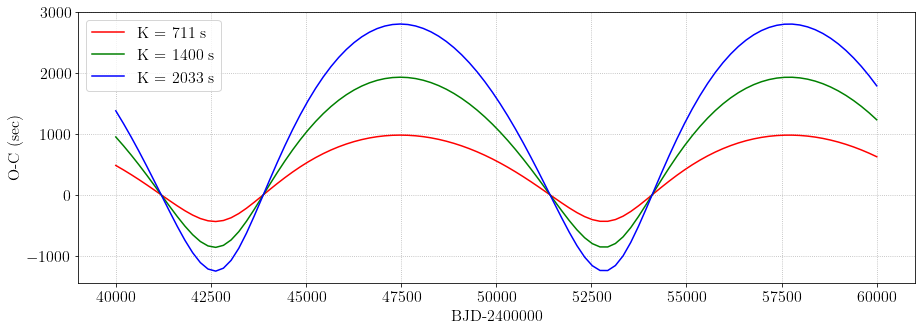

In [20]:
InputFile_out = "K_output_c.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_c = Data_out[:,0]
y_c = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-', color='red',label='K = 711 s')
plt.plot(x_b, y_b, '-', color='green',label='K = 1400 s')
plt.plot(x_c, y_c, '-', color='blue',label='K = 2033 s')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [21]:
#Parameters
K = 2632       
P = 10220       
e = 0.39 
#e = 0 
w = -1.36           
tau = 53025   

output = []
print("     BJD      MAno   EAno        O           C         OC")
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0
    dP = Period - P0
    dT0 = T0 - T0
    OC = dP*Epoch + dT0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    print('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    
data_out = output
f = open("K_output_d.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

     BJD      MAno   EAno        O           C         OC
40000.00000 4.55869 4.21580 47925.72720 46141.61722 1784.10998
40202.02020 4.68289 4.32220 47857.34622 46343.63742 1513.70880
40404.04040 4.80709 4.43229 47773.57873 46545.65762 1227.92110
40606.06061 4.93129 4.54664 47675.92623 46747.67783 928.24839
40808.08081 5.05549 4.66591 47566.46456 46949.69803 616.76653
41010.10101 5.17969 4.79090 47448.08188 47151.71823 296.36365
41212.12121 5.30389 4.92247 47324.81338 47353.73843 -28.92505
41414.14141 5.42810 5.06164 47202.30389 47555.75863 -353.45474
41616.16162 5.55230 5.20950 47088.42022 47757.77884 -669.35863
41818.18182 5.67650 5.36715 46993.98944 47959.79904 -965.80960
42020.20202 5.80070 5.53553 46933.50197 48161.81924 -1228.31727
42222.22222 5.92490 5.71506 46925.31568 48363.83944 -1438.52376
42424.24242 6.04910 5.90515 46990.43235 48565.85964 -1575.42729
42626.26263 6.17330 6.10366 47148.70997 48767.87985 -1619.16988
42828.28283 0.01431 0.02346 47412.52338 48969.90005 -1557.37

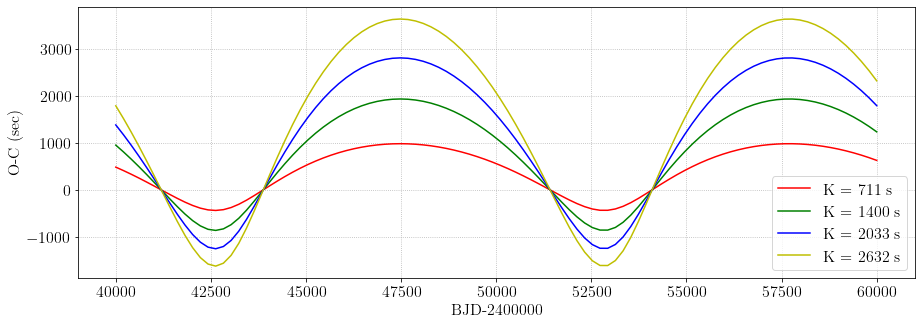

In [22]:
InputFile_out = "K_output_d.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_d = Data_out[:,0]
y_d = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-', color='red',label='K = 711 s')
plt.plot(x_b, y_b, '-', color='green',label='K = 1400 s')
plt.plot(x_c, y_c, '-', color='blue',label='K = 2033 s')
plt.plot(x_d, y_d, '-', color='y',label='K = 2632 s')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [23]:
#Parameters
K = 3136       
P = 10220       
e = 0.39 
#e = 0 
w = -1.36           
tau = 53025   

output = []
print("     BJD      MAno   EAno        O           C         OC")
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0
    dP = Period - P0
    dT0 = T0 - T0
    OC = dP*Epoch + dT0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    print('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    
data_out = output
f = open("K_output_e.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

     BJD      MAno   EAno        O           C         OC
40000.00000 4.55869 4.21580 48267.36581 46141.61722 2125.74859
40202.02020 4.68289 4.32220 48147.20586 46343.63742 1803.56844
40404.04040 4.80709 4.43229 48008.71306 46545.65762 1463.05544
40606.06061 4.93129 4.54664 47853.67641 46747.67783 1105.99858
40808.08081 5.05549 4.66591 47684.56927 46949.69803 734.87124
41010.10101 5.17969 4.79090 47504.83283 47151.71823 353.11460
41212.12121 5.30389 4.92247 47319.27500 47353.73843 -34.46343
41414.14141 5.42810 5.06164 47134.62151 47555.75863 -421.13712
41616.16162 5.55230 5.20950 46960.24559 47757.77884 -797.53325
41818.18182 5.67650 5.36715 46809.04759 47959.79904 -1150.75145
42020.20202 5.80070 5.53553 46698.29269 48161.81924 -1463.52655
42222.22222 5.92490 5.71506 46649.85408 48363.83944 -1713.98537
42424.24242 6.04910 5.90515 46688.75517 48565.85964 -1877.10447
42626.26263 6.17330 6.10366 46838.65654 48767.87985 -1929.22332
42828.28283 0.01431 0.02346 47114.30267 48969.90005 -1855.

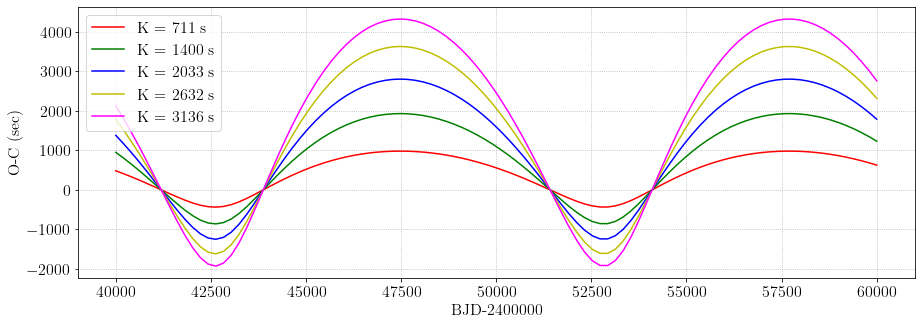

In [24]:
InputFile_out = "K_output_e.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_e = Data_out[:,0]
y_e = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-', color='red',label='K = 711 s')
plt.plot(x_b, y_b, '-', color='green',label='K = 1400 s')
plt.plot(x_c, y_c, '-', color='blue',label='K = 2033 s')
plt.plot(x_d, y_d, '-', color='y',label='K = 2632 s')
plt.plot(x_e, y_e, '-', color='magenta',label='K = 3136 s')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(x_a[0],x_a[-1])
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
plt.savefig("DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K2_rev2.pdf", format='pdf', dpi=1200)
plt.show()